In [2]:
import matplotlib
print(matplotlib.__version__)


3.10.8


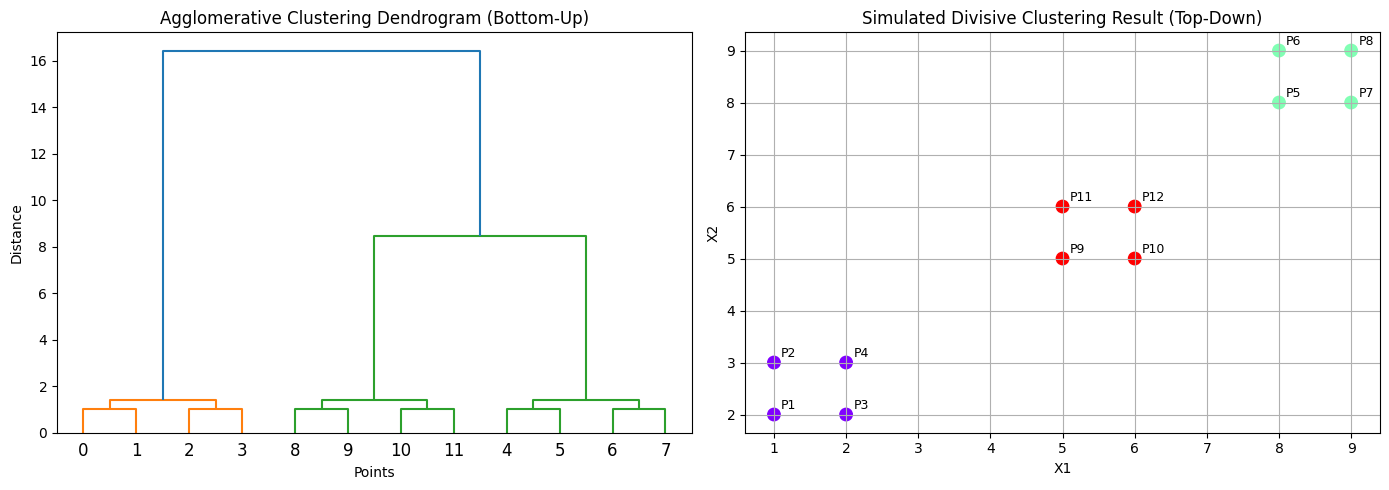

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# 1. Create synthetic dataset (12 points)
X = np.array([
    [1,2],[1,3],[2,2],[2,3],   # cluster 1
    [8,8],[8,9],[9,8],[9,9],   # cluster 2
    [5,5],[6,5],[5,6],[6,6]    # cluster 3
])

# 2. Agglomerative Clustering (Ward linkage dendrogram)
Z = linkage(X, method='ward')

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
dendrogram(Z)
plt.title("Agglomerative Clustering Dendrogram (Bottom-Up)")
plt.xlabel("Points")
plt.ylabel("Distance")

# 3. Simulated Divisive Clustering (Top-down using recursive KMeans)
def divisive_clustering(X, n_clusters=3):
    # Start with all points in one cluster
    clusters = {0: X}
    labels = np.zeros(len(X), dtype=int)
    current_cluster_id = 1
    
    while len(clusters) < n_clusters:
        # Pick the largest cluster to split
        largest_cluster_id = max(clusters, key=lambda k: len(clusters[k]))
        points = clusters.pop(largest_cluster_id)
        
        # Split using KMeans into 2 subclusters
        km = KMeans(n_clusters=2, random_state=42).fit(points)
        sub_labels = km.labels_
        
        # Assign new cluster IDs
        for sub in [0,1]:
            clusters[current_cluster_id] = points[sub_labels==sub]
            for idx, x in enumerate(X):
                if any((x == points[sub_labels==sub]).all(axis=1)):
                    labels[idx] = current_cluster_id
            current_cluster_id += 1
    
    return labels

labels = divisive_clustering(X, n_clusters=3)

plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=labels, cmap="rainbow", s=80)
for i, (x,y) in enumerate(X):
    plt.text(x+0.1, y+0.1, f"P{i+1}", fontsize=9)
plt.title("Simulated Divisive Clustering Result (Top-Down)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)

plt.tight_layout()
plt.show()
